In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.ensemble import RandomForestClassifier
import random
from tqdm import *
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import adjusted_rand_score
import missingno as msno
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier


In [2]:
runner = pd.read_csv("../../../output/data_clean/cleaned_runner.csv", index_col=0)
race = pd.read_csv("../../../output/data_clean/cleaned_race_equivalent_distance.csv", index_col= 0)
runner.age_range = pd.Categorical(
    runner.age_range, categories=['16-25','26-40','40-60','61+','Undefined'],ordered=True
)

#runner = runner.dropna()
race = race.assign(
    date = pd.to_datetime(race[['month', 'day', 'year']])
)
join = pd.merge(runner, race, left_on="race_year_id", right_on="race_year_id", how="left")
join = join.loc[join.age_range != "Undefined"]
join = join.assign(
    relative_ranking = join.ranking / join.frequency_in_ranking
)
join = join.loc[~join.runner_id.isna()]

In [3]:
join = join.assign(
    dropped = join.time_in_seconds.isna()
)

In [4]:
len(join.loc[join.dropped == False])

112176

In [5]:
drop_count = join.groupby('race_year_id').sum()
drop_count = drop_count[['dropped']]

In [6]:
race = pd.merge(race, drop_count, left_on="race_year_id", right_on="race_year_id", how="left")

In [7]:
race = race.assign(
    has_drop = race.dropped > 0
)

In [8]:
race.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1133 entries, 0 to 1132
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   race_year_id          1133 non-null   int64         
 1   event                 1133 non-null   object        
 2   race                  1133 non-null   object        
 3   country               1133 non-null   object        
 4   participation         1133 non-null   object        
 5   distance              1133 non-null   float64       
 6   elevation_gain        1133 non-null   float64       
 7   elevation_loss        1133 non-null   float64       
 8   aid_stations          1133 non-null   int64         
 9   participants          1133 non-null   int64         
 10  country_code          1133 non-null   object        
 11  year                  1133 non-null   int64         
 12  month                 1133 non-null   int64         
 13  day               

0.7336956521739131
              precision    recall  f1-score   support

       False       0.75      0.71      0.73       276
        True       0.72      0.76      0.74       276

    accuracy                           0.73       552
   macro avg       0.73      0.73      0.73       552
weighted avg       0.73      0.73      0.73       552



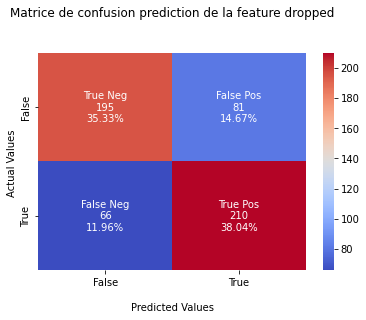

<Figure size 432x288 with 0 Axes>

In [14]:
#importing and training the model
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

df_dropped = race.loc[race.has_drop == True]
df_ndropped = race.loc[race.has_drop == False].sample(n = 276, random_state=0)
df2 = pd.concat([df_dropped, df_ndropped])
X = df2.drop(columns=['race_year_id','event','race','country','participation','country_code','date','dropped',
                      'has_drop'])
y = df2['has_drop']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

X = StandardScaler().fit_transform(X)
lr = LogisticRegression(solver='newton-cg', max_iter=1000)

predicted = cross_val_predict(lr, X, y, cv=10)

#Calculating and printing the f1 score 
print(metrics.accuracy_score(y, predicted))
print(metrics.classification_report(y, predicted))
cm = metrics.confusion_matrix(y, predicted)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm, annot=labels, fmt='', cmap='coolwarm')

ax.set_title('Matrice de confusion prediction de la feature dropped\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()
plt.savefig("Cofusion_Matrix_dropped_logreg_max_weigh")

0.7572463768115942
              precision    recall  f1-score   support

       False       0.79      0.70      0.74       276
        True       0.73      0.81      0.77       276

    accuracy                           0.76       552
   macro avg       0.76      0.76      0.76       552
weighted avg       0.76      0.76      0.76       552



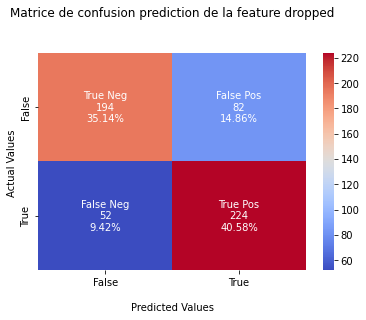

<Figure size 432x288 with 0 Axes>

In [20]:
#importing and training the model
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

df_dropped = race.loc[race.has_drop == True]
df_ndropped = race.loc[race.has_drop == False].sample(n = 276, random_state=0)
df2 = pd.concat([df_dropped, df_ndropped])
X = df2.drop(columns=['race_year_id','event','race','country','participation','country_code','date','dropped',
                      'has_drop'])
y = df2['has_drop']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

X = StandardScaler().fit_transform(X)
lr = LinearDiscriminantAnalysis()

predicted = cross_val_predict(lr, X, y, cv=10)

#Calculating and printing the f1 score 
print(metrics.accuracy_score(y, predicted))
print(metrics.classification_report(y, predicted))
cm = metrics.confusion_matrix(y, predicted)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm, annot=labels, fmt='', cmap='coolwarm')

ax.set_title('Matrice de confusion prediction de la feature dropped\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()
plt.savefig("Cofusion_Matrix_dropped_logreg_max_weigh")

In [22]:
race.assign(
    has_drop = race.has_drop.astype(int)
)

,race_year_id,event,race,country,participation,distance,elevation_gain,elevation_loss,aid_stations,participants,country_code,year,month,day,frequency_in_ranking,equivalent_distance,weighted_elevation,date,dropped,has_drop
0,68140,Peak District Ultras,Millstone 100,United Kingdom,solo,166.9,4520.0,-4520.0,10,150,GBR,2021,9,3,25,212.1,0.213107,2021-09-03,12,1
1,72496,UTMB®,UTMB®,France,solo,170.7,9930.0,-9930.0,11,2300,FRA,2021,8,27,1526,270.0,0.367778,2021-08-27,0,0
2,69855,Grand Raid des Pyrénées,Ultra Tour 160,France,solo,167.0,9980.0,-9980.0,13,600,FRA,2021,8,20,455,266.8,0.374063,2021-08-20,218,1
3,67856,Persenk Ultra,PERSENK ULTRA,Bulgaria,solo,164.0,7490.0,-7500.0,13,150,BGR,2021,8,20,55,238.9,0.313520,2021-08-20,15,1
4,70469,Runfire Salt Lake Ultra,100 Mile,Turkey,solo,159.9,100.0,-100.0,12,13,TUR,2021,8,20,13,160.9,0.006215,2021-08-20,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1128,2320,Centurion Thames Path 100,Centurion Thames Path 100,United Kingdom,solo,161.0,1600.0,-1600.0,0,114,GBR,2012,3,3,114,177.0,0.090395,2012-03-03,0,0
1129,3439,RUN2KILL,RUN2KILL,Germany,solo,161.0,4000.0,-4000.0,0,15,DEU,2012,2,24,15,201.0,0.199005,2012-02-24,0,0
1130,5640,IRON HORSE Endurance RunS,IRON HORSE 100M,United States,solo,161.0,2400.0,-2400.0,0,25,USA,2012,2,10,25,185.0,0.129730,2012-02-10,0,0
1131,3202,Rocky Raccoon,100 Mile,United States,solo,161.0,1800.0,-1800.0,0,218,USA,2012,2,4,218,179.0,0.100559,2012-02-04,0,0


Index(['distance', 'elevation_gain', 'elevation_loss', 'aid_stations',
       'participants', 'year', 'month', 'day', 'frequency_in_ranking',
       'equivalent_distance', 'weighted_elevation', 'dropped', 'has_drop'],
      dtype='object')


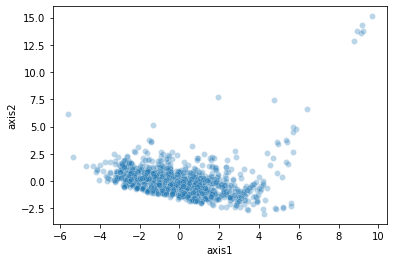

In [27]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

df = race.drop(columns=['race_year_id','event','race','country','participation','country_code','date'])
print(df.columns)

df_SS = StandardScaler().fit_transform(df)
cls = PCA(n_components=5)
pcs = cls.fit_transform(df_SS)

X = pd.DataFrame(pcs, columns=["axis1", "axis2","axis3","axis4","axis5"])
X.index = df.index
sns.scatterplot(x = "axis1", y = "axis2", data = X, alpha=0.3)
plt.savefig('../../../output/ACP_all_runners.pdf')


In [29]:
cls.explained_variance_ratio_

array([0.32404432, 0.18661679, 0.12588015, 0.08443654, 0.0768255 ])